# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
fig_width = 20
t_titre = 35/2
t_label = 25/2
colors = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown','darkred','red']
from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)

In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','SR','TN','YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','SR','TN','YK'] :
        a = 'parametre/param_Fit_%s.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            param.append(b)

In [6]:
print(len(colors)==len(param)==len(exp))

True


In [7]:
p_hat_bcp_e = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
p_hat_bcp_m = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

for x in range(len(exp)):
        
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    tau = N_trials/5.
    h = 1./tau
    
    p_hat_block_e = [[],[],[]]
    p_hat_block_m = [[],[],[]]

    
    for block in range(N_blocks):
        liste = [0,50,100,150,200]
        for a in range(len(liste)-1) :
            #----------------------------------------------------
            p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
            p_hat_e, r_hat_e = bcp.readout(p_bar, r, beliefs, mode='expectation')
            p_hat_m, r_hat_m = bcp.readout(p_bar, r, beliefs, mode='max')
            
            p_hat_block_e[block].extend(p_hat_e)
            p_hat_block_m[block].extend(p_hat_m)

    p_hat_bcp_e[x] = p_hat_block_e
    p_hat_bcp_m[x] = p_hat_block_m

In [8]:
# liste de tout
full_proba = []
full_bino = []
full_results = []
full_va = []
full_p_hat_e = []
full_p_hat_m = []


# listes de tout par sujet
proba_sujet = []
bino_sujet = []
results_sujet = []
va_sujet = []
p_hat_sujet_e = []
p_hat_sujet_m = []

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    p_hat_e = p_hat_bcp_e[x]
    p_hat_m = p_hat_bcp_m[x]
    
    liste_proba = []
    liste_bino = []
    liste_results = []
    liste_va = []
    liste_p_hat_e = []
    liste_p_hat_m = []
    
    for block in range(N_blocks):
                
        switch = []
        for s in range(N_trials):
            if s in [0,50,100,150] :
                switch.append(s)
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)
        
        for s1 in range(len(switch)-1) :

            for trial in np.arange(switch[s1], switch[s1+1]) :
                full_proba.append(p[trial, block, 1])
                full_bino.append(p[trial, block, 0])
                full_results.append(results[trial, block])
                full_va.append(v_anti[block][trial])

                liste_proba.append(p[trial, block, 1])
                liste_bino.append(p[trial, block, 0])
                liste_results.append(results[trial, block])
                liste_va.append(v_anti[block][trial])

                full_p_hat_e.append(p_hat_e[block][trial])
                full_p_hat_m.append(p_hat_m[block][trial])

                liste_p_hat_e.append(p_hat_e[block][trial])
                liste_p_hat_m.append(p_hat_m[block][trial])


    proba_sujet.append(liste_proba)
    bino_sujet.append(liste_bino)
    results_sujet.append(liste_results)
    va_sujet.append(liste_va)
    p_hat_sujet_e.append(liste_p_hat_e)
    p_hat_sujet_m.append(liste_p_hat_m)

In [9]:
nb_sujet = len(proba_sujet)

## Figure Poster

In [10]:
for x in range(len(exp)):
    print(x, 'sujet =', exp[x]['observer'])

0 sujet = TN
1 sujet = SR
2 sujet = FM
3 sujet = LB
4 sujet = YK
5 sujet = DC
6 sujet = IP
7 sujet = AM
8 sujet = BMC
9 sujet = OP
10 sujet = CS
11 sujet = RS


In [11]:
t_titre = 35
t_label = 25
fig_width= 15

In [12]:
def figure(mode, kde=None, sujet=[6]) :
    fig, axs = plt.subplots(len(sujet)+3, 1, figsize=(fig_width, fig_width/(1.6180)))
    fig.subplots_adjust(left = 0, bottom = -1/2+(((len(sujet))*2/3)-0.16), right = 1, top =len(sujet))

    gs1 = gridspec.GridSpec(len(sujet), 1)
    gs1.update(left=0, bottom=(len(sujet))*2/3, right=1, top=len(sujet), hspace=0.05)
    for s in range(len(sujet)) :
        axs[s] = plt.subplot(gs1[s])

    gs2 = gridspec.GridSpec(1, 2)
    gs2.update(left=0, bottom=-1/2+(((len(sujet))*2/3)-0.16), right=1, top=((len(sujet))*2/3)-0.16, wspace=0.2)
    axs[len(sujet)+1] = plt.subplot(gs2[0])
    axs[len(sujet)+2] = plt.subplot(gs2[1])

    
    ec = 0.2
    for s in range(len(sujet)) :
        print(sujet[s], '=', exp[sujet[s]]['observer'])

        N_trials = exp[sujet[s]]['N_trials']
        N_blocks = exp[sujet[s]]['N_blocks']
        p = exp[sujet[s]]['p']
        tau = N_trials/5.
        h = 1./tau 

        results = (exp[sujet[s]]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
        v_anti = param[sujet[s]]['v_anti']
        
        axs[s].set_yticks([0, 1, 1+ec, 2+ec, 2+ec*2, 3+ec*2])
        axs[s].set_yticklabels(['0','1','0','1','0','1'],fontsize=t_label/2)
        axs[s].yaxis.set_label_coords(-0.02, 0.5)
        axs[s].set_ylabel('Subject %s'%(sujet[s]), fontsize=t_label)
        axs[s].bar(49, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
        axs[s].bar(99, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
        axs[s].bar(149, 3+ec*3, bottom=-ec/2, color='k', width=0, linewidth=2)
        #------------------------------------------------
        ax_block = axs[s].twinx()

        if s == 0 :
            ax_block.set_ylabel('Block', fontsize=t_label/1.5, rotation='horizontal', ha='left', va='bottom')
        ax_block.yaxis.set_label_coords(1.01, 1.08)

        ax_block.set_ylim(0, N_blocks)
        ax_block.set_yticks(np.arange(N_blocks)+0.5)
        ax_block.set_yticklabels(np.arange(N_blocks)+1, fontsize=t_label/1.5)
        ax_block.yaxis.set_tick_params(width=0, pad=(t_label/1.5)+10)
        #------------------------------------------------

        for block in range(N_blocks):

            #----------------------------------------------------------------------------------
            liste = [0,50,100,150,200]
            for a in range(len(liste)-1) :
                p_bar, r, beliefs = bcp.inference(p[liste[a]:liste[a+1], block, 0], h=h, p0=.5)
                p_hat, r_hat = bcp.readout(p_bar, r, beliefs,mode=mode)
                p_low, p_sup = np.zeros_like(p_hat), np.zeros_like(p_hat)
                for i_trial in range(50):
                    p_low[i_trial], p_sup[i_trial] = stats.beta.ppf([.05, .95], a=p_hat[i_trial]*r_hat[i_trial],
                                                                    b=(1-p_hat[i_trial])*r_hat[i_trial])

                if block == 0 :
                    if a == 0 :
                        axs[s].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block,
                                    c='darkred',
                                    alpha=.9, lw=1.5,
                                    label='$\hat{p}_{%s}$'%(mode))
                    else :
                        axs[s].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block,
                                    c='darkred', lw=1.5)
                else :
                    axs[s].plot(np.arange(liste[a], liste[a+1]), block+p_hat+ec*block,
                                c='darkred', lw=1.5)
                axs[s].plot(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block,
                            c='darkred', ls='--', lw=1.2)
                axs[s].plot(np.arange(liste[a], liste[a+1]), block+p_low+ec*block,
                            c='darkred', ls= '--', lw=1.2)

                axs[s].fill_between(np.arange(liste[a], liste[a+1]), block+p_sup+ec*block,
                                    block+p_low+ec*block, lw=.5, alpha=.11,
                                    facecolor='darkred')

            #----------------------------------------------------------------------------------
            axs[s].step(range(N_trials), block+p[:, block, 1]+ec*block, lw=1, alpha=0.13, c='k')
            axs[s].fill_between(range(N_trials), block+np.zeros_like(p[:, block, 1])+ec*block,
                                block+p[:, block, 1]+ec*block,
                                lw=0, alpha=.13, facecolor='black', step='pre')
            if block == 0 :
                axs[s].step(range(N_trials), block+results[:, block]+ec*block, color='r',
                            lw=1.2, label='Individual guess')
                axs[s].step(range(N_trials),
                            block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                            color='k', lw=1.2, label='Eye movements')
            else :
                axs[s].step(range(N_trials), block+results[:, block]+ec*block, lw=1.2, color='r')
                axs[s].step(range(N_trials),
                            block+((np.array(v_anti[block])-np.nanmin(v_anti))/(np.nanmax(v_anti)-np.nanmin(v_anti)))+ec*block,
                            color='k', lw=1.2)
            #----------------------------------------------------------------------------------

        axs[s].set_ylim(-(ec/2), N_blocks +ec*3-(ec/2))


    
    if mode=='expectation' :
        p_hat_sujet = p_hat_sujet_e
        full_p_hat = full_p_hat_e
    elif mode=='max' :
        p_hat_sujet = p_hat_sujet_m
        full_p_hat = full_p_hat_m
    
    if kde is None :
        for x, color in enumerate(colors[:nb_sujet]):
            axs[len(sujet)+1].scatter(p_hat_sujet[x], results_sujet[x], c=color, alpha=0.5, linewidths=0)
            axs[len(sujet)+2].scatter(p_hat_sujet[x], va_sujet[x], c=color, alpha=0.5, linewidths=0)

    else :
        x = full_p_hat
        y = full_results
        xmin, xmax =  -0.032, 1.032
        ymin, ymax =  -0.032, 1.032
        xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)
        axs[len(sujet)+1].contourf(xx, yy, f, cmap='Greys')
        
        # masque les essais qui où full_va = NAN
        full_p_hat_nan = np.ma.masked_array(full_p_hat, mask=np.isnan(full_va)).compressed()
        full_va_nan = np.ma.masked_array(full_va, mask=np.isnan(full_va)).compressed()

        x = full_p_hat_nan
        y = full_va_nan
        xmin, xmax = -0.032, 1.032
        ymin, ymax = -21.28, 21.28
        xx, yy = np.mgrid[xmin:xmax:300j, ymin:ymax:300j]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)
        axs[len(sujet)+2].contourf(xx, yy, f, cmap='Greys')
        
    slope, intercept, r_, p_value, std_err = stats.linregress(full_p_hat, full_results)
    x_test = np.linspace(np.min(full_p_hat), np.max(full_p_hat), 100)
    fitLine = slope * x_test + intercept
    axs[len(sujet)+1].plot(x_test, fitLine, c='k', linewidth=2)
    axs[len(sujet)+1].text(0.75,-0.032+(1.032--0.032)/10, 'r = %0.3f'%(r_), fontsize=t_label/1.2)

    axs[len(sujet)+1].axis([-0.032, 1.032, -0.032, 1.032])
    axs[len(sujet)+1].set_ylabel('Probability Bet', fontsize=t_label/1.2)
    axs[len(sujet)+1].set_title("Probability Bet", fontsize=t_titre/1.2, x=0.5, y=1.05)
    axs[len(sujet)+1].set_xlabel('$\hat{P}_{%s}$'%(mode), fontsize=t_label/1) 


    full_p_hat_nan = np.ma.masked_array(full_p_hat, mask=np.isnan(full_va)).compressed()
    full_va_nan = np.ma.masked_array(full_va, mask=np.isnan(full_va)).compressed()
    slope, intercept, r_value, p_value, std_err = stats.linregress(full_p_hat_nan, full_va_nan)
    x_test = np.linspace(np.min(full_p_hat), np.max(full_p_hat), 100)
    fitLine = slope * x_test + intercept
    axs[len(sujet)+2].plot(x_test, fitLine, c='k', linewidth=2)
    axs[len(sujet)+2].text(0.75,-21.28+(21.28--21.28)/10, 'r = %0.3f'%(r_value), fontsize=t_label/1.2)

    axs[len(sujet)+2].axis([-0.032, 1.032, -21.28, 21.28])
    axs[len(sujet)+2].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label/1.2)
    axs[len(sujet)+2].set_title("Acceleration", fontsize=t_titre/1.2, x=0.5, y=1.05)
    axs[len(sujet)+2].set_xlabel('$\hat{P}_{%s}$'%(mode), fontsize=t_label/1)    


    for i_layer in range(len(axs)) :
        axs[i_layer].xaxis.set_ticks_position('bottom')
        axs[i_layer].yaxis.set_ticks_position('left')
        axs[i_layer].xaxis.set_tick_params(labelsize=t_label/1.8)
        axs[i_layer].yaxis.set_tick_params(labelsize=t_label/1.8)
        if i_layer < len(sujet)-1 :
            axs[i_layer].set_xticks([])
        elif i_layer == len(sujet)-1 :
            axs[i_layer].set_xlabel('Trials', fontsize=t_label)
            axs[i_layer].set_xticks([-1, 49, 99,149])
            axs[i_layer].set_xticklabels([0, 50, 100, 150], ha='left',fontsize=t_label/1.8)


    axs[0].legend(fontsize=t_label/1.2, bbox_to_anchor=(0., 1.05, 1, 0.), loc=4, ncol=3,
              mode="expand", borderaxespad=0.)
    axs[0].set_title('Results bayesian change point %s'%(mode), fontsize=t_titre, x=0.5, y=1.3)

    plt.show()

In [13]:
sujet = [6, 10, 5]

6 = IP
10 = CS
5 = DC


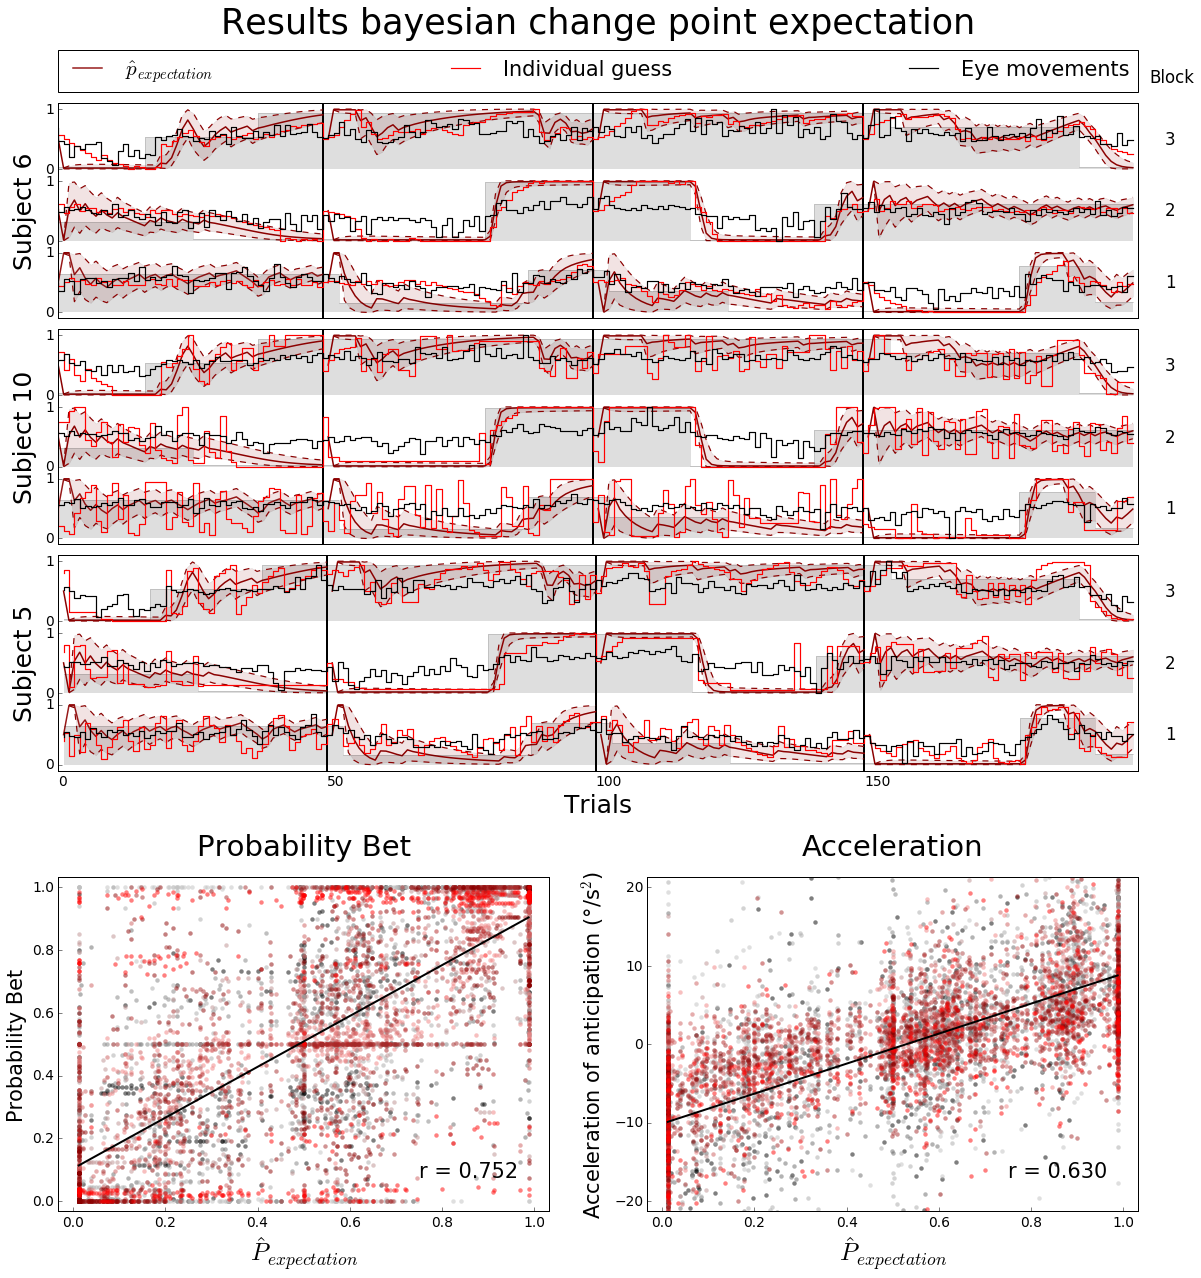

6 = IP
10 = CS
5 = DC


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


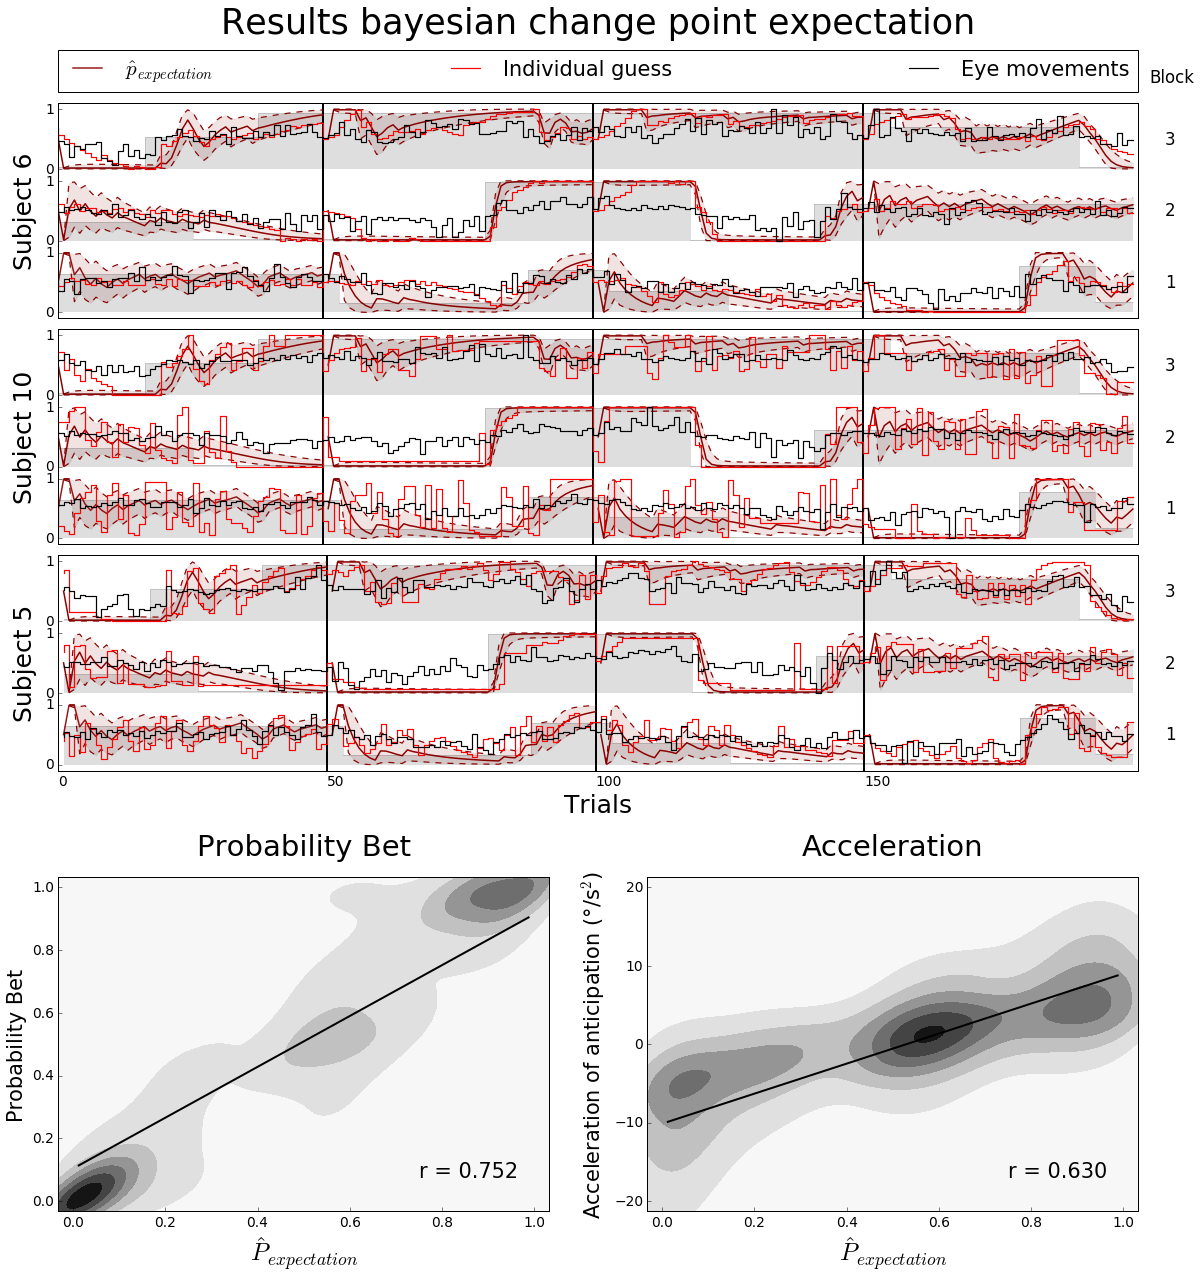

In [14]:
figure(mode='expectation', sujet=sujet)
figure(mode='expectation', kde=True, sujet=sujet)

6 = IP
10 = CS
5 = DC


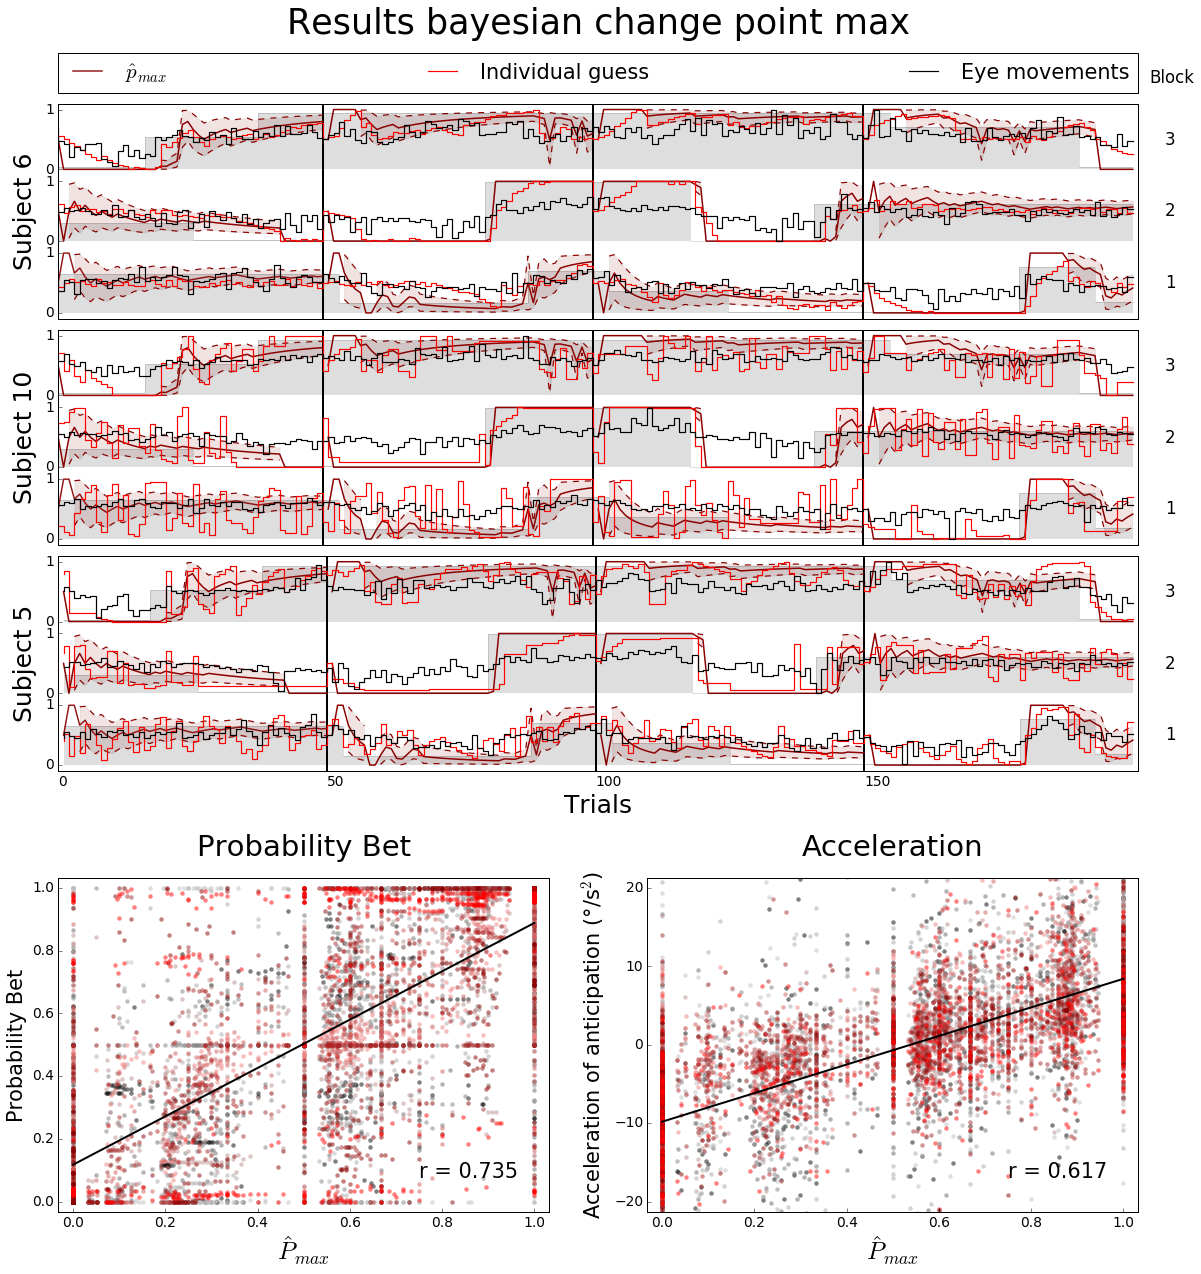

6 = IP
10 = CS
5 = DC


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


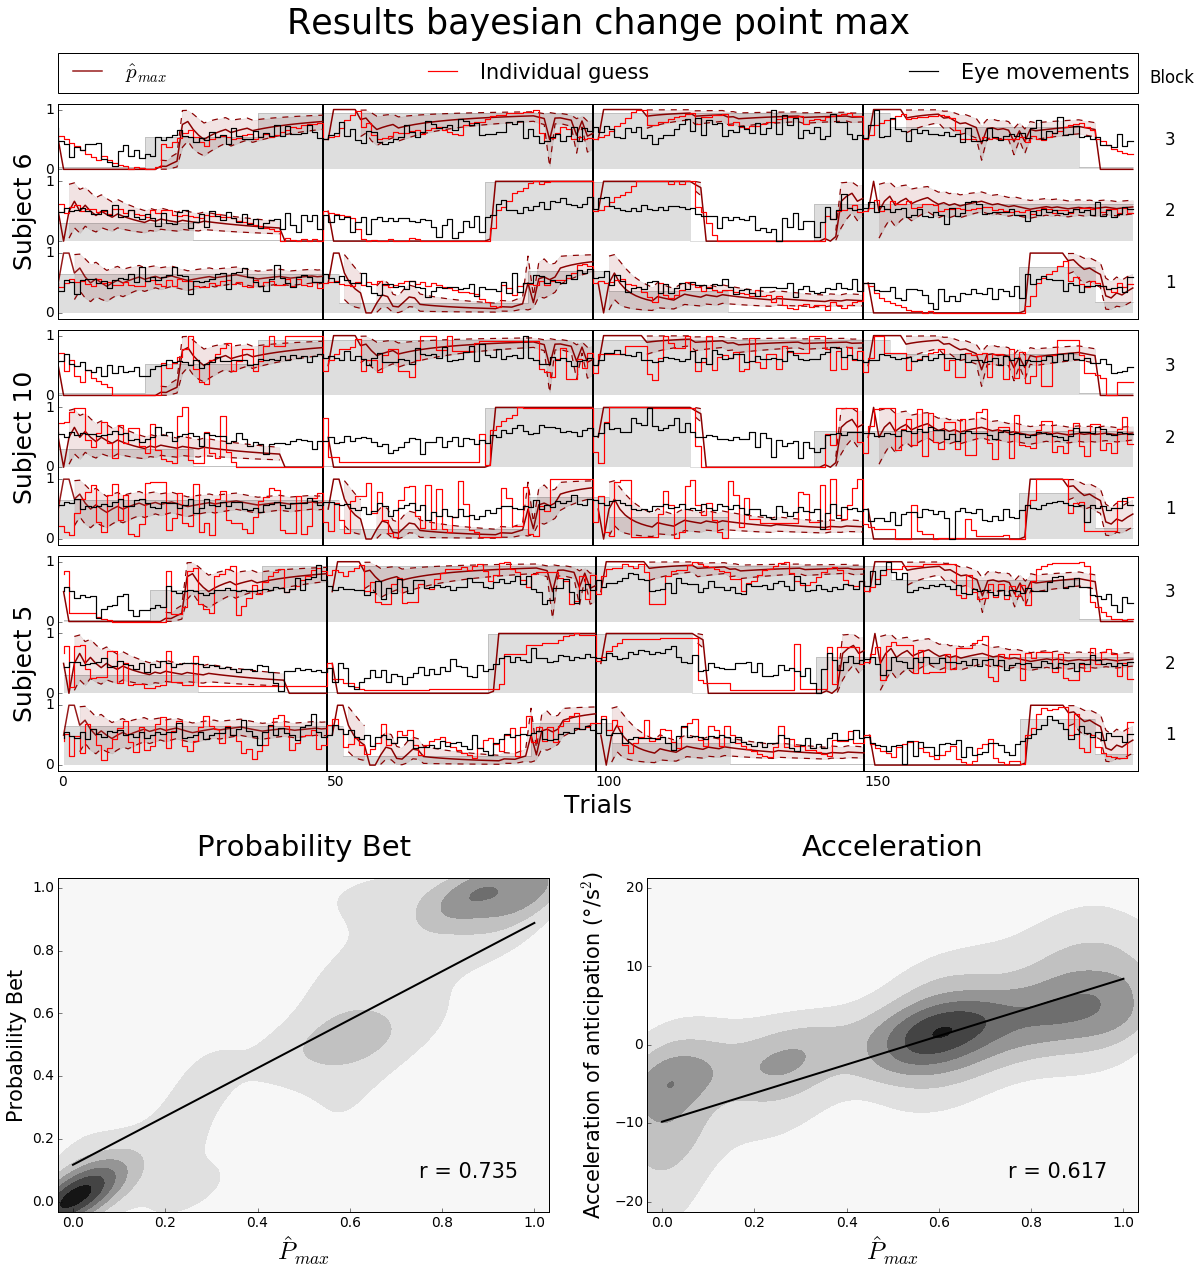

In [15]:
figure(mode='max', sujet=sujet)
figure(mode='max', kde=True, sujet=sujet)